<a href="https://colab.research.google.com/github/Hasib1938/Hasib1938/blob/main/Qubit_Teleportation_%26_Superdense_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Dependencies**

In [ ]:
!pip install qiskit

In [ ]:
!pip install pylatexenc

In [ ]:
!pip install qiskit-aer

In [ ]:
from qiskit import *
from qiskit_aer import Aer
import numpy as np

from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.providers.basic_provider import BasicProvider

# **Quantum Teleportation**

## **Create Circuit**

In [ ]:
qr0 = QuantumRegister(2,'Alice')
qr1 = QuantumRegister(1,'Bob')
cr = ClassicalRegister(3, 'Classical bit')

In [ ]:
circuit = QuantumCircuit(qr0,qr1, cr)

In [ ]:
circuit.x(qr0[0])
# from math import pi

# circuit.barrier()
# circuit.rx(pi/6, qr0[0])

In [ ]:
circuit.h(1)
circuit.cx(1,2)

In [ ]:
circuit.barrier()
circuit.cx(qr0[0],qr0[1])

circuit.h(qr0[0])

In [ ]:
circuit.barrier()
circuit.measure(qr0[0], cr[0])
circuit.measure(qr0[1], cr[1])

In [ ]:
circuit.barrier()
circuit.z(qr1).c_if(cr[0], 1)
circuit.x(qr1).c_if(cr[1], 1)

In [ ]:
circuit.measure(qr1,cr[2])

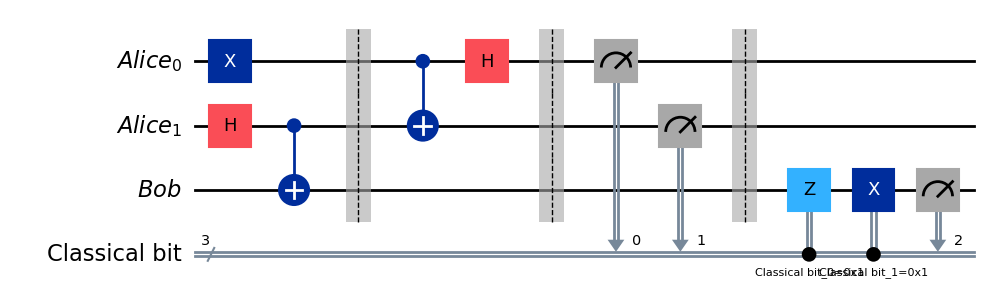

In [ ]:
circuit.draw(output = 'mpl')

## **Simulation**

In [ ]:
simulator = Aer.get_backend("qasm_simulator")

backend = BasicProvider().get_backend('basic_simulator')
transpiled_circuit = transpile(circuit, backend)

result = backend.run(transpiled_circuit, shots = 1000).result()
result

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='46b86d03-1986-47d8-ad92-826889dafcaf', job_id='7815dbce-c325-4fd2-969d-742d03f24087', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 249, '0x6': 243, '0x5': 247, '0x4': 261}), header=QobjExperimentHeader(qubit_labels=[['Alice', 0], ['Alice', 1], ['Bob', 0]], n_qubits=3, qreg_sizes=[['Alice', 2], ['Bob', 1]], clbit_labels=[['Classical bit', 0], ['Classical bit', 1], ['Classical bit', 2]], memory_slots=3, creg_sizes=[['Classical bit', 3]], name='circuit-171', global_phase=0.0, metadata={}), status=DONE, name='circuit-171', seed_simulator=1487438901, time_taken=0.3793778419494629)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.37939000129699707)

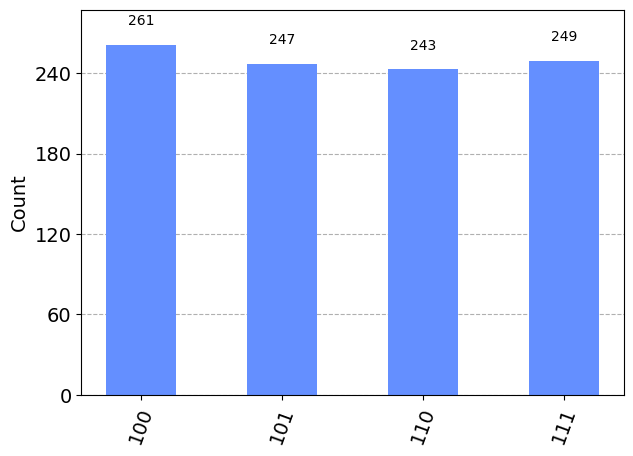

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))


# **Superdense Coding**

In [ ]:
qr = QuantumRegister(2, 'Qubit')
cr = ClassicalRegister(2, 'CBit')

spd_circ = QuantumCircuit(qr, cr)

In [ ]:
spd_circ.h(0)
spd_circ.cx(qr[0],qr[1])
spd_circ.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'Qubit'), 0), Qubit(QuantumRegister(2, 'Qubit'), 1)), clbits=())

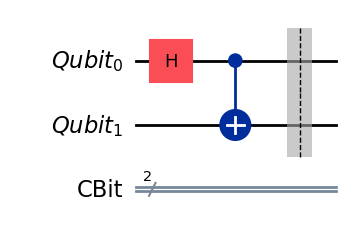

In [ ]:
spd_circ.draw(output = 'mpl')

If they want to send 00 then they perform no operation.

If they want to send 01 then they perform a Pauli-Z operation where q1s state is flipped.

If they want to send 10 then they apply a Pauli-X gate.

If they want to send 11 then apply a Pauli-Z gate followed by a Pauli-X gate

In [ ]:
spd_circ.x(qr[0])
spd_circ.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'Qubit'), 0), Qubit(QuantumRegister(2, 'Qubit'), 1)), clbits=())

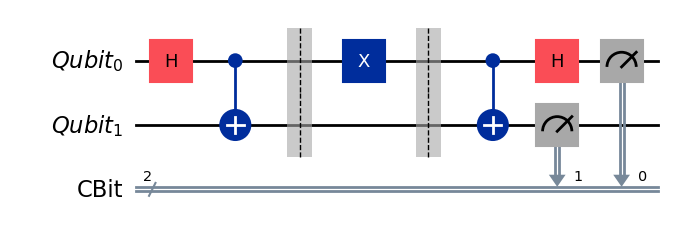

In [ ]:
spd_circ.draw(output = 'mpl')

In [ ]:
spd_circ.cx(qr[0],qr[1])
spd_circ.h(qr[0])

In [ ]:
spd_circ.measure(qr,cr)

In [ ]:
simulator = Aer.get_backend("qasm_simulator")

backend = BasicProvider().get_backend('basic_simulator')
transpiled_circuit = transpile(spd_circ, backend)

result = backend.run(transpiled_circuit, shots = 1000).result()
result

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='7dfa23a2-ff57-4130-ba3a-ad59fffa25b3', job_id='0181f577-3aa1-47d2-b17f-44cd24aa8878', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 1000}), header=QobjExperimentHeader(qubit_labels=[['Qubit', 0], ['Qubit', 1]], n_qubits=2, qreg_sizes=[['Qubit', 2]], clbit_labels=[['CBit', 0], ['CBit', 1]], memory_slots=2, creg_sizes=[['CBit', 2]], name='circuit-169', global_phase=0.0, metadata={}), status=DONE, name='circuit-169', seed_simulator=450828561, time_taken=0.004277944564819336)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.0043222904205322266)

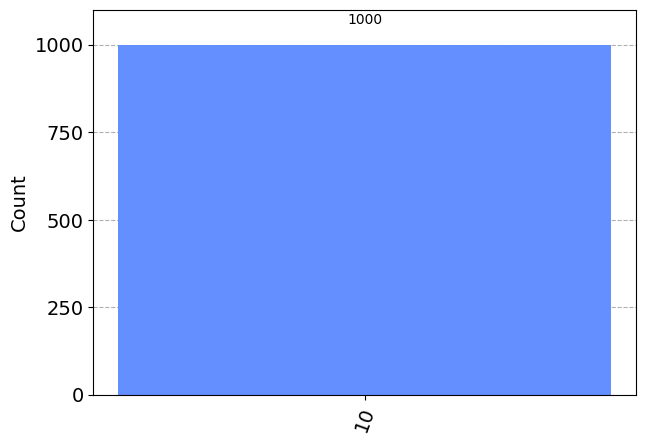

In [ ]:
plot_histogram(result.get_counts(spd_circ))